# Homework 3: Neural Networks


This assignment is due on Moodle by **11:59pm on Friday October 25**. 
Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.
Your solutions to computational questions should include any specified Python code and results 
as well as written commentary on your conclusions.
Remember that you are encouraged to discuss the problems with your instructors and classmates, 
but **you must write all code and solutions on your own**. For a refresher on the course **Collaboration Policy** click [here](https://github.com/BoulderDS/CSCI5622-Machine-Learning/blob/master/info/syllabus.md#collaboration-policy).


**NOTES**: 

- Do **NOT** load or use any Python packages that are not available in Anaconda (Version: 2019.07) with Python 3.7. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 
- In this homework, we will use [Keras](https://keras.io/) to implement a classifier. First upgrade your `pip` package manager to the latest version (Version >19.0). Then install the current stable release for CPU-only of [TensorFlow](https://www.tensorflow.org/install) (version: 2.0.0) as the backend for Keras. We will use [`tf.keras`](https://www.tensorflow.org/api_docs/python/tf/keras) as our Keras API.
```
pip install --upgrade pip
pip install tensorflow
```
**Acknowledgment** : Chris Ketelsen

Name: Swarnalatha Natarajan

In [1]:
import math
import pickle
import gzip
import numpy as np
import pandas
import matplotlib.pylab as plt
%matplotlib inline

[25 points] Problem 1 - Single-Layer and Multilayer Perceptron Learning
---

**Part 1 [15 points]:** Consider learning the following concepts with either a single-layer or multilayer perceptron where all hidden and output neurons utilize the *indicator* activation functions. For each of the following concepts, state whether the concept can be learned by a single-layer perceptron. Briefly justify your response by providing weights, biases, and the *indicator* activation functions if applicable:

- $\; \texttt{NOT } x_1$

- $\; x_1 \texttt{ NAND } x_2$

- $\; x_1 \texttt{ XNOR } x_2$ (output 1 when $x_1 = x_2$ and 0 otherwise)

**1. $\; \texttt{NOT } x_1$ :** This concept can be learned by a single-layer perceptron.

This single-layer perceptron consists of one weight w = -1 and one bias b= +0.5 value. The indicator function is:

if $w . x + b \leq 0, y=0$ else if  $w . x + b \gt 0, y=1$ 

where x is the input and y is the output.

**2. $\; x_1 \texttt{ NAND } x_2$ :** This concept can be learned by a single-layer perceptron.

This single-layer perceptron consists of weights $w_1 = -1, w_2 = -1$ and one bias b= +1.5 value. The indicator function is:

if $w_1 . x_1 + w_2 . x_2 + b \leq 0, y=0$ else if  $w_1 . x_1 + w_2 . x_2 + b \gt 0, y=1$ 

where x_1, x_2 are the inputs and y is the output.

**3. $\; x_1 \texttt{ XNOR } x_2$** (output 1 when $x_1 = x_2$ and 0 otherwise)

This concept cannot be learned by a single-layer perceptron. It requires 2 layers.

**Part 2 [10 points]:** Determine an architecture and specific values of the weights and biases in a single-layer or multilayer perceptron with *indicator* activation functions that can learn $x_1 \texttt{ XNOR } x_2$. Make a truth table of $x_1$, $x_2$, and $x_1 \texttt{ XNOR } x_2$, describe your perceptron's architecture, and state your weight matrices and bias vectors in Markdown below. Then demonstrate that your solution is correct by implementing forward propagation for your network in Python and showing that it produces the correct boolean output values for each of the four possible combinations of $x_1$ and $x_2$.

**Architecture**

The  $\; x_1 \texttt{ XNOR } x_2$ function is the $\texttt{OR}$ of $\texttt{ AND }$ and $\texttt{ NOR }$ functions. 

The $\texttt{ AND }$ function has the weights :  $w_{13}=1, w_{14}=1$, bias $b_{1}=-1.5$ and indicator function 

if $w_{13} . x_1 + w_{14} . x_2 + b_1 \leq 0, y=0$ else if  $w_{13} . x_1 + w_{14} . x_2 + b_1  \gt 0, y=1$ 

The $\texttt{ NOR }$ function has the weights $w_{23}=-1, w_{24}=-1$, bias $b_{2}=0.5$ and indicator function 

if $w_{23} . x_1 + w_{24} . x_2 + b_2 \leq 0, y=0$ else if  $w_{23} . x_1 + w_{24} . x_2 + b_2  \gt 0, y=1$ 

The outputs of the  $\texttt{ AND }$ and  $\texttt{ NOR }$functions are given as inputs to the $\texttt{ OR }$ function which has the weights $w_{35}=1, w_{45}=1$, bias $b_{3}=-0.5$ and indicator function 

if $w_{35} . x_1 + w_{45} . x_2 + b_3 \leq 0, y=0$ else if  $w_{13} . x_1 + w_{14} . x_2 + b_3  \gt 0, y=1$ 

**Truth Table**
<table>
  <thead>
    <tr>
      <th>x1</th>
      <th>x2</th>
      <th>x1 XNOR x2</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>0</td>
      <td>0</td>
      <td>1</td>  
    </tr>
    <tr>
      <td>0</td>
      <td>1</td>
      <td>0</td>  
    </tr>
    <tr>
      <td>1</td>
      <td>0</td>
      <td>0</td>  
    </tr>
    <tr>
      <td>1</td>
      <td>1</td>
      <td>1</td>  
    </tr>
</table>

***The truth table depicting the working of the entire two-layer perceptron***

<table>
  <thead>
    <tr>
      <th>x_1</th>
      <th>x_2</th>
        <th>x1 AND x2</th>
        <th>x1 NOR x2</th>
        <th>x1 OR x2</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>0</td>
      <td>0</td>
      <td>0</td>  
      <td>1</td>
      <td>1</td>
    </tr>
    <tr>
      <td>0</td>
      <td>1</td>
      <td>0</td>  
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <td>1</td>
      <td>0</td>
      <td>0</td>  
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <td>1</td>
      <td>1</td>
      <td>1</td>  
      <td>0</td>
      <td>1</td>
    </tr>
  </tbody>
</table>

This shows that the $\texttt{OR}$ of $\texttt{ AND }$ and $\texttt{ NOR }$ functions gives the $\; x_1 \texttt{ XNOR } x_2$ function.

**Weight matrices and bias vectors**

$W_1 = \begin{bmatrix}1 & -1\\1 & -1\end{bmatrix}$

$W_2 = \begin{bmatrix}1 \\ 1\end{bmatrix}$

$b_1 = \begin{bmatrix}-1.5 \\ 0.5\end{bmatrix}$

$b_2 = \begin{bmatrix}-0.5\end{bmatrix}$

In [132]:
# YOUR CODE HERE
def activation(X):
    threshold=0
    result=[]
    for x in X:
        if x>0:
            result.append(1)
        elif x<0:
            result.append(0)
    return result
#Target values
y=[[1],[0],[0],[1]]
#Input values
X=np.array([[0,0],[0,1],[1,0],[1,1]])
#Weight matrices
w1,w2=np.array([[1,-1],[1,-1]]),np.array([1,1])
#Bias vectors
b1,b2=np.array([-1.5,0.5]),-0.5
and_nor_output=[]
my_output=[]
#AND and NOR Function
for x in X:
    and_nor_output.append(activation(x.dot(w1)+b1))
and_nor_output=np.array(and_nor_output)
#OR Function i.e. AND OR NOR
for x in and_nor_output:
    my_output.append(activation([x.dot(w2)+b2]))
#Checking computed values with target values
if my_output==y:
    print("My network produces the correct boolean output values "+\
          "for each of the four possible combinations of  𝑥1  and  𝑥2")
else:
    print("My network does not work")
    
#raise NotImplementedError()


My network produces the correct boolean output values for each of the four possible combinations of  𝑥1  and  𝑥2


[25 points] Problem 2 - Back propagation
---

In this problem you will gain some intuition about why training deep neural networks can be very time consuming.  Consider training a chain-like neural network: 

![chain-like nn](figs/chain_net.png)

Note that this network has three weights $W^1, W^2, W^3$ and three biases $b^1, b^2,$ and $b^3$ (for this problem you can think of each parameter as a single value or as a $1 \times 1$ matrix). Suppose that each hidden and output neuron is equipped with a sigmoid activation function and the loss function is given by 

$$
\ell(y, a^4) = \frac{1}{2}(y - a^4)^2  
$$

where $a^4$ is the value of the activation at the output neuron and $y \in \{0,1\}$ is the true label associated with the training example. 

**Part 1 [5 points]:** Suppose each of the weights is initialized to $W^k = 1.0$ and each bias is initialized to $b^k = -0.5$.  Use forward propagation to find the activities and activations associated with each hidden and output neuron for the training example $(x, y) = (0.5,0)$. Show your work. 


***Given***

Training example :

$(x,y) = (0.5,0)$

Weights : 

$W^{1},W^{2},W^{3} = 1$

Biases :

$𝑏^{1},𝑏^{2},𝑏^{3} = -0.5$

***Let $z^{2},z^{3} and z^{4}$ be the activities ; $a^{2}, a^{3}$ and $a^{4}$ be the activations and $\sigma$ be the sigmoid activation i.e the activation function***

At the Input layer,

$a^{1} = x$

At the Hidden layer,

$z^{2} = W^{1}.x+b^{1} = 1(0.5)-0.5 = 0$

$a^{2}=\sigma(z^{2})=\sigma(0)=0.5$

$z^{3} = W^{2}.a^{2}+b^{2}=1(0.5)-0.5=0$

$a^{3}=\sigma(z^{3})=\sigma(0)=0.5$

At the Output layer,

$z^{4} = W^{3}.a^{3}+b^{3}=1(0.5)-0.5=0$

$a^{4}=\sigma(z^{4})=\sigma(0)=0.5$

Output $ \hat{y}=a^{4}=0.5$


**Part 2 [5 points]:** Use Back-Propagation to compute the weight and bias derivatives $\partial \ell / \partial W^k$ and $\partial \ell / \partial b^k$ for $k=1, 2, 3$.  Show all work. 

At Output layer L=3,

$\delta^{3} = (a^{4}-y) . \sigma'(z^3)=(a^{4}-y) . (\sigma(z^3) . (1-\sigma(z^3))=(0.5-0) . (\sigma(0) . (1-\sigma(0))=(0.5) . (0.5 . 0.5)=0.125$

$\partial \ell / \partial W^3 = \delta^{3}(a^3)^T = 0.125 . (0.5)^T =0.0625$

$\partial \ell / \partial b^3 = \delta^{3} =0.125$

At Hidden layer L=2,

$\delta^{2}=(W^{3})^{T}. \delta^{3} . \sigma'(z^2) = (1) . 0.125 .  (\sigma(0) . (1-\sigma(0))=0.125 . 0.5 . 0.5 = 0.03125$

$\partial \ell / \partial W^2 = \delta^{2} . (a^{2}) = 0.03125 . 0.5 = 0.015625$

$\partial \ell / \partial b^2 = \delta^{2} = 0.03125$

At L=1,

$\delta^{1}=(W^{2})^{T}. \delta^{2} . \sigma'(z^1) = (1) . 0.03125 .  (\sigma(0) . (1-\sigma(0))=0.03125 . 0.5 . 0.5 = 0.0078125$

$\partial \ell / \partial W^1 = \delta^{1} .(a^{1}) =  0.0078125 . 0.5 = 0.003906$

$\partial \ell / \partial b^1 = \delta^{1} =  0.0078125$

**Part 3 [5 points]:** Implement the following activation functions:
* ReLU
* Sigmoid
* softmax

In [133]:
def relu(x):
    # YOUR CODE HERE
    return max(0,x)
    raise NotImplementedError()

def sigmoid(x):
    # YOUR CODE HERE
    return 1.0 / (1.0 + np.exp(-x))
    raise NotImplementedError()

def softmax(x):
    # YOUR CODE HERE
    d=sum([np.exp(i) for i in x])
    result=[np.exp(i)/d for i in x]
    return result
    raise NotImplementedError()

In [122]:
# for grading - ignore
assert relu(5) == 5
assert relu(-5) == 0
assert relu(0) == 0
assert sigmoid(0.458) == 0.61253961344091512
assert sigmoid(2) == 0.8807970779778823
res = softmax([1,2,4])
temp = [0.04201007, 0.1141952 , 0.84379473]
for i in range(len(temp)):
    assert res[i] - temp[i] < 1e-5

[0.04201006613406605, 0.11419519938459449, 0.8437947344813395]


**Part 4 [5 points]:** Implement the following Loss functions:
* mean squared error
* mean absolute error
* hinge

In [5]:
def mean_squared_error(yhat, y):
    # YOUR CODE HERE
    sum=0
    for i in range(len(y)):
        sum+=(y[i]-yhat[i])**2
    return sum/len(y)
    raise NotImplementedError()
    
def mean_absolute_error(yhat, y):
    # YOUR CODE HERE
    sum=0
    for i in range(len(y)):
        sum+=abs(y[i]-yhat[i])
    return sum/len(y)
    raise NotImplementedError()

def hinge(yhat, y):
    # YOUR CODE HERE
    result=[max(0,1-y[i]*yhat[i]) for i in range(len(y))]
    return sum(result)/len(y)
    raise NotImplementedError()

In [6]:
# for grading - ignore
y_true = np.array([3, -0.5, 2, 7])
y_pred = np.array([2.5, 0.0, 2, 8])
assert mean_squared_error(y_pred,y_true) == 0.375
assert mean_absolute_error(y_pred,y_true) == 0.5
assert hinge(y_pred,y_true) == 0.25

**Part 5 [5 points]:** Explain the vanishing gradient problem. When would you observe this? Give an example.

As more layers using certain activation functions are added to neural networks, the gradients of the loss function approaches zero, making the network hard to train. This is because certain activation functions, like the sigmoid function, map a large input space into a small input space between 0 and 1. Therefore, a large change in the input of the sigmoid function will cause a small change in the output. Hence, the derivative becomes small. 
For shallow network with only a few layers that use these activations, this isn’t a big problem. However, when more layers are used, it can cause the gradient to be too small for training to work effectively. In fact, the gradients might decay becoming zero.

For example, if we use Guassian initialization of weights $W^{i} \approx N(0,1)$

Then $\left|W^{i}\right|\lt 1$

Then $\left|W^{i} \sigma'(z^{i})\right|\lt 1/ 4$

$\partial{ \ell }/ \partial {b^{1}}$ would decay to zero exponentially.


[25 Points] Problem 3 - Build a feedforward neural network
---

In this problem you will implement a class representing a general feed-forward neural network that utilizes the sigmoid activation functions. Your tasks will be to implement forward propagation, prediction, back propagation, and a general train routine to learn the weights in your network via stochastic gradient descent.

The skeleton for the network class is below. Note that this class is almost identical to the one you worked with in the "hands-on neural network" in-class notebook, so you should look at there to remind yourself of the details. Scroll down to find more information about your tasks as well as unit tests.

In [41]:
import argparse
import numpy as np
import pickle
import gzip
import matplotlib.pyplot as plt


class Network:
    def __init__(self, sizes, keep_prob=-1):
        self.L = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(n, 1) for n in self.sizes[1:]] #self.sizes[1:] hidden layer and output
        self.weights = [np.random.randn(n, m) for (
            m, n) in zip(self.sizes[:-1], self.sizes[1:])] #self.sizes[:-1] input and hidden; zip(self.sizes[:-1], self.sizes[1:]) = input, hidden, hidden, output
        self.keep_prob = keep_prob#weights has 2 elements : input to hidden and hidden to output
        self.acc_train_array = []
        self.acc_test_array = []

    def g(self, z):
        """
        activation function
        """
        return sigmoid(z)

    def g_prime(self, z):
        """
        derivative of activation function
        """
        return sigmoid_prime(z)

    def forward_prop(self, a):
        """
        memory aware forward propagation for testing
        only.  back_prop implements it's own forward_prop
        """
        # YOUR CODE HERE
        a_list = [a]
        z_list = [np.zeros(a.shape)]  # Pad with a placeholder so that indices match

        for W, b in zip(self.weights, self.biases):
            z = np.dot(W, a) + b
            z_list.append(z)
            a = self.g(z)
            a_list.append(a)
        return a_list[-1]
        #raise NotImplementedError()


    def grad_cost(self, a, y):
        """
        gradient of cost function
        Assumes C(a,y) = (a-y)^2/2
        """
        return (a - y)

    def SGD_train(self, train, epochs, eta, lam=0.0, verbose=True, test=None):
        """
        SGD for training parameters
        epochs is the number of epocs to run
        eta is the learning rate
        lam is the regularization parameter
        If verbose is set will print progressive accuracy updates
        If test set is provided, routine will print accuracy on test set as learning evolves
        """
        n_train = len(train)
        for epoch in range(epochs):
            perm = np.random.permutation(n_train)
            for kk in range(n_train):
                xk = train[perm[kk]][0]
                yk = train[perm[kk]][1]
                # TODO: get gradients with xk, yk and do SGD on weights and biases
                # YOUR CODE HERE
                #dW_list,db_list=self.back_prop(xk, yk)
                dW_list,db_list=self.back_prop_dropout(xk, yk)
                for ll in range(self.L - 1):
                    self.weights[ll]=(1-eta*lam)*self.weights[ll]- eta*(dW_list[ll])
                    self.biases[ll] = self.biases[ll] - eta * db_list[ll]
                #raise NotImplementedError()
            if verbose:
                if epoch == 0 or (epoch + 1) % 20 == 0:
                    acc_train = self.evaluate(train)
                    self.acc_train_array.append(acc_train)
                    if test is not None:
                        acc_test = self.evaluate(test)
                        self.acc_test_array.append(acc_test)
                        print("Epoch {:4d}: Train {:10.5f}, Test {:10.5f}".format(
                            epoch+1, acc_train, acc_test))
                    else:
                        print("Epoch {:4d}: Train {:10.5f}".format(
                            epoch+1, acc_train))

    def back_prop(self, x, y):
        """
        Back propagation for derivatives of C wrt parameters
        """
        db_list = [np.zeros(b.shape) for b in self.biases]
        dW_list = [np.zeros(W.shape) for W in self.weights]
        
        a = x
        a_list = [a]
        z_list = [np.zeros(a.shape)]  # Pad with a placeholder so that indices match

        for W, b in zip(self.weights, self.biases):
            z = np.dot(W, a) + b
            z_list.append(z)
            a = self.g(z)
            a_list.append(a)

        # Back propagate deltas to compute derivatives
        # The following list gives hints on how to do it
        # calculating delta (Error) for the output layer
        # for the appropriate layers compute db_list[ell], dW_list[ell], delta

        # YOUR CODE HERE
        delta_list = [np.zeros((n, 1)) for n in self.sizes]
        delta_list[self.L - 1] = self.grad_cost(a_list[self.L - 1], y) * self.g_prime(z_list[self.L - 1])
        
        # loop backward through layers, backprop deltas, compute dWs and dbs
        # TODO
        for ll in range(self.L - 1, 0, -1):
            db_list[ll - 1] = delta_list[ll]
            dW_list[ll - 1] = np.dot(delta_list[ll], a_list[ll - 1].T)
            delta_list[ll - 1] = np.dot(self.weights[ll - 1].T, delta_list[ll]) * self.g_prime(z_list[ll - 1])
            
        #raise NotImplementedError()
        return (dW_list, db_list)
    
    def back_prop_dropout(self, x, y):
        """
        Back propagation with dropout on the hidden layers other than the output layer.
        
        Dropout layer can be thought of as a special linear layer between layers.
        """
        db_list = [np.zeros(b.shape) for b in self.biases]
        dW_list = [np.zeros(W.shape) for W in self.weights]
        
        a = x
        a_list = [a]
        z_list = [np.zeros(a.shape)]  # Pad with a placeholder so that indices match
        # TODO: implement dropout using self.keep_prob
        # YOUR CODE HERE
        i,h,o=self.sizes
        if self.keep_prob!=-1:
            dropout_matrix=[np.random.binomial(1,self.keep_prob,b.shape) for b in self.biases] 
            for i in range(len(self.biases)):
                z=np.dot(self.weights[i],a)+self.biases[i]
                z_list.append(z)
                a=self.g(z)
                if(i!=len(self.biases)-1):
                    a=a*dropout_matrix[i]
                a_list.append(a)
        else:
            
            for W, b in zip(self.weights, self.biases):
                z = np.dot(W, a) + b
                z_list.append(z)
                a = self.g(z)
                a_list.append(a)

        delta_list = [np.zeros((n, 1)) for n in self.sizes]
        delta_list[self.L - 1] = self.grad_cost(a_list[self.L - 1], y) * self.g_prime(z_list[self.L - 1])
        
        for ll in range(self.L - 1, 0, -1):
            db_list[ll - 1] = delta_list[ll]
            dW_list[ll - 1] = np.dot(delta_list[ll], a_list[ll - 1].T)
            delta_list[ll - 1] = np.dot(self.weights[ll - 1].T, delta_list[ll]) * self.g_prime(z_list[ll - 1])
        #raise NotImplementedError()
        return (dW_list, db_list)

    def evaluate(self, test):
        """
        Evaluate current model on labeled test data
        """
        ctr = 0
        for x, y in test:
            yhat = self.forward_prop(x)
            ctr += np.argmax(yhat) == np.argmax(y)
        return float(ctr) / float(len(test))


def sigmoid(z, threshold=20):
    z = np.clip(z, -threshold, threshold)
    return 1.0 / (1.0 + np.exp(-z))


def sigmoid_prime(z):
    return sigmoid(z) * (1.0 - sigmoid(z))


def mnist_digit_show(flatimage, outname=None):

    import matplotlib.pyplot as plt

    image = np.reshape(flatimage, (-1, 14))

    plt.matshow(image, cmap=plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    if outname:
        plt.savefig(outname)
    else:
        plt.show()


**Part 1 [15 points]:** Implement `SGD_train`, `back_prop`, and `forward_prop`. Use the following test cases to verify if the code is working as expected.

In [42]:
from tests import tests
tests.run_test_suite('prob 3', Network)

TestBackPropWithoutRegularization (tests.tests.TestNetwork) ... ok
TestBackPropWithRegularization (tests.tests.TestNetwork) ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.425s

OK


**Part 2 [10 points]:**

Run the above Network on MNIST Dataset and report the following (feel free to experiment with different learning rates).

* Change the hidden layer dimensions and experiment with these values: [5, 10, 20].
* Plot accuracies of different hidden layer dimensions vs. epochs for both training and testing.
* Explain the effect of hidden layer dimension on performance. 

**Note:** Accuracies are stored in `self.acc_train_array` and `self.acc_test_array` if `verbose` is `True`.

In [44]:
location = './data/tinyMNIST.pkl.gz'
f = gzip.open(location, 'rb')
u = pickle._Unpickler(f)
u.encoding = 'latin1'
train, test = u.load()
input_dimensions = len(train[0][0])
output_dimensions = len(train[0][1])
print('Number of Input Features: ', input_dimensions)
print('Number of Output classes: ', output_dimensions)
nns = []
for hidden_layer_dimensions in [5, 10, 20]:
    print('\nHidden Layer Dimensions: ', hidden_layer_dimensions)
    nn = Network([input_dimensions, hidden_layer_dimensions, output_dimensions])
    nns.append(nn)
    nn.SGD_train(train, epochs=200, eta=0.1, lam=0.0001, verbose=True, test=test)

Number of Input Features:  196
Number of Output classes:  10

Hidden Layer Dimensions:  5
Epoch    1: Train    0.25450, Test    0.26771
Epoch   20: Train    0.81112, Test    0.72789
Epoch   40: Train    0.87395, Test    0.76110
Epoch   60: Train    0.89436, Test    0.78311
Epoch   80: Train    0.89876, Test    0.78431
Epoch  100: Train    0.89796, Test    0.78511
Epoch  120: Train    0.89236, Test    0.77871
Epoch  140: Train    0.90196, Test    0.78912
Epoch  160: Train    0.90196, Test    0.77951
Epoch  180: Train    0.89916, Test    0.79112
Epoch  200: Train    0.90316, Test    0.78671

Hidden Layer Dimensions:  10
Epoch    1: Train    0.40896, Test    0.38615
Epoch   20: Train    0.90036, Test    0.82153
Epoch   40: Train    0.92437, Test    0.84194
Epoch   60: Train    0.93037, Test    0.83954
Epoch   80: Train    0.93117, Test    0.84314
Epoch  100: Train    0.94158, Test    0.85434
Epoch  120: Train    0.94478, Test    0.85434
Epoch  140: Train    0.94838, Test    0.85554
Epoch 

Plot training results below.

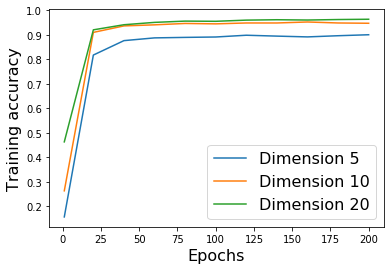

In [10]:
# YOUR CODE HERE
train_accuracy=[]
for nn in nns:
    train_accuracy.append(nn.acc_train_array)
epochs=[1]
for i in range(20,201,20):
    epochs.append(i)
d=[5, 10, 20]
for i in range(len(train_accuracy)):
    plt.plot(epochs,train_accuracy[i],label="Dimension "+str(d[i]))
    plt.xlabel("Epochs", fontsize=16)
    plt.ylabel("Training accuracy", fontsize=16)
    plt.legend(loc="lower right", fontsize=16)
#raise NotImplementedError()

Plot testing results below.

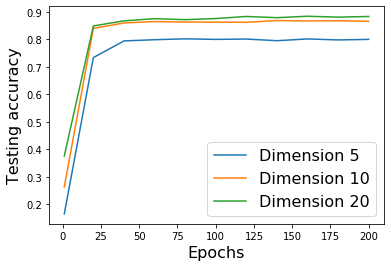

In [11]:
# YOUR CODE HERE
test_accuracy=[]
for nn in nns:
    test_accuracy.append(nn.acc_test_array)
for i in range(len(test_accuracy)):
    plt.plot(epochs,test_accuracy[i],label="Dimension "+str(d[i]))
    plt.xlabel("Epochs", fontsize=16)
    plt.ylabel("Testing accuracy", fontsize=16)
    plt.legend(loc="lower right", fontsize=16)
#raise NotImplementedError()

Give your explanation below.

As hidden layer dimension increases, the model's performance clearly increases. This is because the increase in hidden layer dimension increases the number of learnable parameters. This in turn decreases the bias and increases the variance. Hence, the model performs better.

**Extra Credit [10 points]:** Implement dropout by filling the `back_prop_dropout` function and update the `SGD_train` function to use it. Explain the impact of dropout on performance.

In [43]:
hidden_layer_dimensions = 60
nn = Network([input_dimensions, hidden_layer_dimensions, output_dimensions], keep_prob=0.5)
nn.SGD_train(train, epochs=400, eta=0.1, lam=0, verbose=True, test=test)#400

Epoch    1: Train    0.11044, Test    0.09724
Epoch   20: Train    0.53261, Test    0.48019
Epoch   40: Train    0.72429, Test    0.68387
Epoch   60: Train    0.73749, Test    0.69548
Epoch   80: Train    0.77151, Test    0.72309
Epoch  100: Train    0.83393, Test    0.76511
Epoch  120: Train    0.83954, Test    0.77711
Epoch  140: Train    0.84474, Test    0.78231
Epoch  160: Train    0.84634, Test    0.78391
Epoch  180: Train    0.84914, Test    0.78792
Epoch  200: Train    0.85154, Test    0.78752
Epoch  220: Train    0.85154, Test    0.78752
Epoch  240: Train    0.85234, Test    0.79072
Epoch  260: Train    0.85274, Test    0.78992
Epoch  280: Train    0.85354, Test    0.79032
Epoch  300: Train    0.85354, Test    0.79072
Epoch  320: Train    0.86875, Test    0.79472
Epoch  340: Train    0.93958, Test    0.83713
Epoch  360: Train    0.93557, Test    0.82593
Epoch  380: Train    0.93798, Test    0.83273
Epoch  400: Train    0.94038, Test    0.83593


Dropout decreases the training accuracy and the test accuracy in the above case. This is because a dropout of 0.5 is too high. Usually a small dropout decreases the training accuracy and increases the test accuracy. This is because dropout regularizes the neural network by setting certain neurons null or dead and setting the weights to/from those neurons to zero. This decreases the bias of the model and increases the variance. Hence, the model performs better during testing.


[25 Points] Problem 4 - Implement RNN Network to classify whether text is spam or ham 
---

Dataset is obtained from UCI Machine Learning repository consisting of SMS tagged messages (labelled as either **ham** (legitimate) or **spam**) that have been collected for SMS Spam research.

We will now use [Keras](https://keras.io/) to implement a classifier. First upgrade your `pip` package manager to the latest version (Version >19.0). Then install the current stable release for CPU-only of [TensorFlow](https://www.tensorflow.org/install) (version: 2.0.0) as the backend for Keras. We will use [`tf.keras`](https://www.tensorflow.org/api_docs/python/tf/keras) as our Keras API.

Update the snippet below to build a Sequential model with an embedding layer, and an LSTM layer, and a dense layer. This question allows you to get familiar with popular deep learning toolkits and the solution only has a few lines. In practice, there is no need to reinvent the wheels.


Learn more about RNN : https://colah.github.io/posts/2015-08-Understanding-LSTMs/

**Part 1 [15 points]:** Complete the following functions `init`, `train`, and `evaluate` functions and report the accuracy

In [15]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer


class RNN:
    '''
    RNN classifier
    '''

    def __init__(self, train_x, train_y, test_x, test_y, dict_size=5000,
                 example_length=150, embedding_length=32, epoches=5, batch_size=128):
        '''
        initialize RNN model
        :param train_x: training data
        :param train_y: training label
        :param test_x: test data
        :param test_y: test label
        :param epoches: number of ephoches to run
        :param batch_size: batch size in training
        :param embedding_length: size of word embedding
        :param example_length: length of examples
        '''
        self.batch_size = batch_size
        self.epoches = epoches
        self.example_len = example_length
        self.dict_size = dict_size
        self.embedding_len = embedding_length

        # preprocess training data
        tok = Tokenizer(num_words=dict_size)
        tok.fit_on_texts(train_x)
        sequences = tok.texts_to_sequences(train_x)
        self.train_x = sequence.pad_sequences(
            sequences, maxlen=self.example_len)
        sequences = tok.texts_to_sequences(test_x)
        self.test_x = sequence.pad_sequences(
            sequences, maxlen=self.example_len)

        self.train_y = train_y
        self.test_y = test_y

        # TODO: build model with Embedding, LSTM and dense layers.
        # Please refer to Sequence classification with LSTM : 
        #     https://keras.io/getting-started/sequential-model-guide/#examples
        # Documentation for LSTM layer in : 
        #     https://keras.io/layers/recurrent/#lstm
        self.model = Sequential()
        # YOUR CODE HERE
        self.model.add(Embedding(self.dict_size,self.embedding_len, input_length=self.example_len))
        self.model.add(LSTM(self.embedding_len))
        self.model.add(Dense(1))
        #raise NotImplementedError()
        self.model.compile(loss='binary_crossentropy',
                           optimizer='adam', metrics=['accuracy'])

    def train(self, verbose=0):
        '''
        fit in data and train model
        please refer to the fit method in https://keras.io/models/model/#fit
        make sure you use batchsize and epochs appropriately.
        :return: None
        '''
        # TODO: fit in data to train your model
        # YOUR CODE HERE
        self.model.fit(self.train_x,self.train_y,batch_size=self.batch_size,epochs=self.epoches)
        #raise NotImplementedError()

    def evaluate(self):
        '''
        evaluate trained model
        please refer to the evaluate method in https://keras.io/models/model/#evaluate
        :return: [loss, accuracy]
        '''
        # YOUR CODE HERE
        loss,accuracy=self.model.evaluate(self.test_x,self.test_y,batch_size=self.batch_size)
        return loss,accuracy
        #raise NotImplementedError()

In [16]:
import pickle
def load_data(location):
    return pickle.load(open(location,'rb'))

In [17]:
train_x, test_x, train_y, test_y = load_data('./data/spam_data.pkl')
rnn = RNN(train_x, train_y, test_x, test_y, epoches=5)
rnn.train(verbose=1)
loss, accuracy = rnn.evaluate()
print('Accuracy for LSTM: ', accuracy)

Train on 4736 samples
Epoch 1/5
4736/4736 [==============================] - 3s 666us/sample - loss: 0.3869 - accuracy: 0.8651
Epoch 2/5
4736/4736 [==============================] - 2s 421us/sample - loss: 0.1204 - accuracy: 0.9538
Epoch 3/5
4736/4736 [==============================] - 2s 417us/sample - loss: 0.0382 - accuracy: 0.9884
Epoch 4/5
4736/4736 [==============================] - 2s 418us/sample - loss: 0.0272 - accuracy: 0.9920
Epoch 5/5
4736/4736 [==============================] - 2s 419us/sample - loss: 0.0198 - accuracy: 0.9954
836/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================

Accuracy for LSTM:  0.99401915


Accuracy of 99.4% was achieved after 5 epochs.

**Part 2 [10 points]:** 
* Change the embedding length and experiment with these values: [8, 16, 32, 48, 64].
* Plot training accuracies of different embedding lengths vs. epochs.
* Observe and explain the impact of embedding length in LSTM Model.

In [18]:
RNNs = []
test_accuracy_array = []
for embedding_len in [8, 16, 32, 48, 64]:
    train_x, test_x, train_y, test_y = load_data('./data/spam_data.pkl')
    rnn = RNN(train_x, train_y, test_x, test_y, epoches=5, embedding_length=embedding_len)
    RNNs.append(rnn)
    rnn.train(verbose=1)
    loss, accuracy = rnn.evaluate()
    test_accuracy_array.append(accuracy)
    print('Accuracy for LSTM: ', accuracy)

train_accuracy_matrix = np.array(list(map(lambda x: x.model.history.history["accuracy"], RNNs)))

Train on 4736 samples
Epoch 1/5
4736/4736 [==============================] - 3s 551us/sample - loss: 0.5060 - accuracy: 0.8651
Epoch 2/5
4736/4736 [==============================] - 1s 289us/sample - loss: 0.3344 - accuracy: 0.8651
Epoch 3/5
4736/4736 [==============================] - 1s 290us/sample - loss: 0.1755 - accuracy: 0.8974
Epoch 4/5
4736/4736 [==============================] - 1s 290us/sample - loss: 0.0556 - accuracy: 0.9844
Epoch 5/5
4736/4736 [==============================] - 1s 289us/sample - loss: 0.0375 - accuracy: 0.9899
836/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================

Accuracy for LSTM:  0.98923445
Train on 4736 samples
Epoch 1/5
4736/4736 [==============================] - 3s 531us/sample - loss: 0.4724 - accuracy: 0.8651
Epoch 2/5
4736/4736 [==============================] - 1s 295us/sample - loss: 0.2421 - accuracy: 0.8788
Epoch 3/5
4736/4736 [==============================] - 1s 296us/sample - loss: 0.0690 - accuracy: 0.9787
Epoch 4/5
4736/4736 [==============================] - 1s 296us/sample - loss: 0.0490 - accuracy: 0.9880
Epoch 5/5
4736/4736 [==============================] - 1s 296us/sample - loss: 0.0266 - accuracy: 0.9913
836/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================

Accuracy for LSTM:  0.98923445
Train on 4736 samples
Epoch 1/5
4736/4736 [==============================] - 3s 653us/sample - loss: 0.3758 - accuracy: 0.8653
Epoch 2/5
4736/4736 [==============================] - 2s 413us/sample - loss: 0.0952 - accuracy: 0.9730
Epoch 3/5
4736/4736 [==============================] - 2s 420us/sample - loss: 0.0445 - accuracy: 0.9854
Epoch 4/5
4736/4736 [==============================] - 2s 425us/sample - loss: 0.0308 - accuracy: 0.9939
Epoch 5/5
4736/4736 [==============================] - 2s 428us/sample - loss: 0.0224 - accuracy: 0.9962
836/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================

Accuracy for LSTM:  0.99401915
Train on 4736 samples
Epoch 1/5
4736/4736 [==============================] - 4s 833us/sample - loss: 0.3340 - accuracy: 0.8832
Epoch 2/5
4736/4736 [==============================] - 3s 535us/sample - loss: 0.0732 - accuracy: 0.9799
Epoch 3/5
4736/4736 [==============================] - 2s 509us/sample - loss: 0.0384 - accuracy: 0.9916
Epoch 4/5
4736/4736 [==============================] - 2s 498us/sample - loss: 0.0305 - accuracy: 0.9960
Epoch 5/5
4736/4736 [==============================] - 2s 505us/sample - loss: 0.0274 - accuracy: 0.9973
836/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================

Accuracy for LSTM:  0.9964115
Train on 4736 samples
Epoch 1/5
4736/4736 [==============================] - 5s 1ms/sample - loss: 0.3008 - accuracy: 0.9016
Epoch 2/5
4736/4736 [==============================] - 4s 824us/sample - loss: 0.0617 - accuracy: 0.9863
Epoch 3/5
4736/4736 [==============================] - 4s 859us/sample - loss: 0.0376 - accuracy: 0.9939
Epoch 4/5
4736/4736 [==============================] - 4s 836us/sample - loss: 0.0323 - accuracy: 0.9958
Epoch 5/5
4736/4736 [==============================] - 4s 853us/sample - loss: 0.0296 - accuracy: 0.9964
836/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================

Accuracy for LSTM:  0.9964115


Plot training results below.

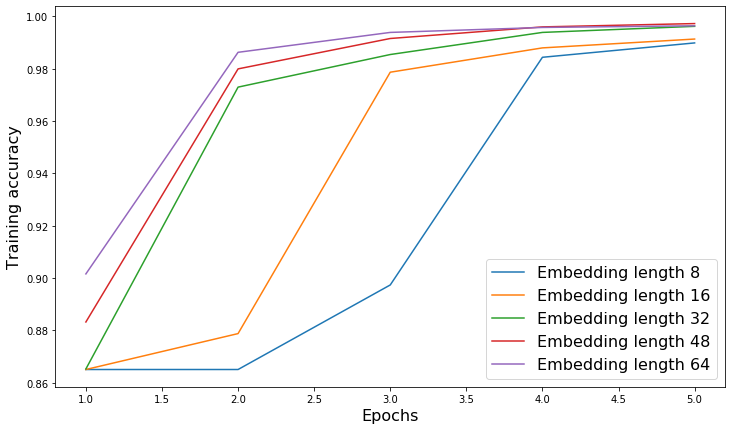

In [19]:
# YOUR CODE HERE
e=[8, 16, 32, 48, 64]
xplot=list(range(1,6))
fig,ax=plt.subplots(nrows=1,ncols=1, figsize=(12,7))
for i in range(len(train_accuracy_matrix)):
    ax.plot(xplot,train_accuracy_matrix[i],label="Embedding length "+str(e[i]))
plt.xlabel("Epochs", fontsize=16)
plt.ylabel("Training accuracy", fontsize=16)
plt.legend(loc="lower right", fontsize=16)
#raise NotImplementedError()

Give your observation and explanation below.

As the embedding length increases, the performance of the model increases. This is because an embedding layer provides a dense representation of words and their relative meanings. Therefore, intuitively increasing the embedding length increases the amount of information learnt by the model. Hence, the performance of the model increases.

### Optional survey.
***

We are always interested in your feedback. At the end of each homework, there is a simple anonymous feedback [survey](https://forms.gle/6Kf72C26am1SAjtg6) to solicit your feedback for how to improve the course.